In [2]:
import pandas as pd
papers = pd.read_csv('book2.csv',encoding='ISO-8859-1')

In [3]:
papers.head()

,ID,Date,Aquirer,Aquired,Heading,Text
0,1,05-Mar-19,Amazon,Harvard hospital,Amazon uses AI to take care of Harvard hospita...,AMAZON has moved to strengthen its ties with A...
1,2,9 January 2019,AppFolio,Dynasty Marketplace,AppFolio Acquires Advanced Artificial Intellig...,"AppFolio, Inc. (NASDAQ: APPF), a leading provi..."
2,3,08-Feb-19,avalara,Indix,Avalara buys AI startup Indix,Tax automation solutions provider Avalara has ...
3,4,05-Jun-18,Black Knight,HeavyWater,Black Knight seeks AI might with HeavyWater deal,"Black Knight has acquired HeavyWater, a develo..."
4,5,27-Feb-19,blackberry,Cylance,BlackBerry buys AI cybersecurity firm Cylance ...,BlackBerry has completed its $1.4 billion acqu...


In [4]:
# Remove the columns
papers = papers.drop(columns=['Date','Aquirer','Aquired','Heading'], axis=1)
# sample only 10 papers - for demonstration purposes
papers = papers.sample(25)
# Print out the first rows of papers
papers.head(5)

,ID,Text
18,19,The Combination Provides New Ways to Enhance E...
17,18,US-based Recall Studios (OTC: BTOP) has close...
0,1,AMAZON has moved to strengthen its ties with A...
19,20,S&P Global Inc. said it would buy technology s...
3,4,"Black Knight has acquired HeavyWater, a develo..."


In [5]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['Text'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

18    the combination provides new ways to enhance e...
17     us-based recall studios (otc: btop) has close...
0     amazon has moved to strengthen its ties with a...
19    s&p global inc. said it would buy technology s...
3     black knight has acquired heavywater, a develo...
Name: paper_text_processed, dtype: object

In [9]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = papers.paper_text_processed.values.tolist()
print(data)
data_words = list(sent_to_words(data))
print(data_words[:2])


['the combination provides new ways to enhance every customer\'s journey, while addressing the evolvingneeds of brands and their agenciesredwood city, ca--(marketwired - sep 5, 2014) - rocket fuel (nasdaq: fuel), a leading provider ofartificial intelligence (ai) advertising solutions for digital marketers, today announced the completion of theacquisition of x plus two solutions inc, the parent company of [x+1], a leading provider of programmaticmarketing and data-management solutions. the acquisition of [x+1] significantly expands the marketopportunity for rocket fuel, enabling integrated storytelling across the customer journey, accelerating thecompany\'s entry into the digital marketing enterprise saas market, and leveraging an enterprise sales andmarketing infrastructure to drive growth."with this acquisition we are meeting the evolving needs of marketers and their agencies," said george john,rocket fuel ceo and chairman. "the merger with [x+1] accelerates our vision to become the l

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [8]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','to','be','of','in'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_trigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:5])

[['say', 'would', 'buy', 'technology', 'investment', 'sector', 'year', 'deal', 'late', 'sign', 'ai', 'almost', 'fifth', 'bank', 'survey', 'associate', 'implement', 'technology', 'business', 'accord', 'report', 'research', 'firm', 'bank', 'tap', 'machine_learne', 'research', 'trading', 'compliance', 'report', 'say', 'base', 'use', 'ai', 'provide', 'analysis', 'financial', 'institution', 'capability', 'critical', 'global', 'forefront', 'technology', 'transformation', 'takingplace', 'financial', 'market', 'say', 'global', 'chief', 'financial', 'officer', 'company', 'found', 'staff', 'consist', 'former', 'employee', 'global', 'spokesman', 'say', 'global', 'known', 'credit', 'rating', 'base', 'company', 'recent', 'build', 'indexing', 'data', 'division', 'last', 'month', 'complete', 'company', 'track', 'global', 'supply', 'datum', 'also', 'invest', 'last', 'year', 'base', 'use', 'ai', 'fixed', 'income', 'trading', 'fourth', 'quarter', 'earning', 'presentation', 'global', 'indicate', 'want', 

In [15]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 6), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1), (30, 2), (31, 4), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 8), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 2), (90, 1), (91, 5), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 4), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 2)

In [16]:
print(corpus[3])
print(id2word[12])
print(id2word[13])
print(id2word[14])

[(5, 2), (7, 1), (12, 1), (17, 1), (30, 1), (38, 1), (43, 1), (50, 1), (72, 4), (80, 3), (83, 1), (91, 2), (97, 2), (103, 1), (106, 1), (116, 3), (117, 2), (119, 1), (121, 1), (128, 1), (136, 1), (140, 1), (141, 1), (142, 1), (147, 2), (148, 1), (151, 1), (157, 5), (165, 5), (168, 1), (172, 1), (202, 1), (203, 1), (207, 1), (214, 1), (217, 1), (224, 1), (225, 1), (254, 1), (260, 1), (268, 1), (271, 1), (272, 1), (273, 3), (274, 1), (275, 1), (276, 1), (277, 1), (278, 1), (279, 1), (280, 1), (281, 1), (282, 2), (283, 1), (284, 1), (285, 1), (286, 1), (287, 1), (288, 1), (289, 2), (290, 1), (291, 4), (292, 1), (293, 1), (294, 1), (295, 1), (296, 2), (297, 2), (298, 1), (299, 1), (300, 2), (301, 1), (302, 1), (303, 1), (304, 2), (305, 2), (306, 1), (307, 5), (308, 1), (309, 2), (310, 2), (311, 2), (312, 1), (313, 1), (314, 1), (315, 1), (316, 1), (317, 1), (318, 1), (319, 2), (320, 1), (321, 1), (322, 1), (323, 1), (324, 1), (325, 2), (326, 1), (327, 2), (328, 2), (329, 1), (330, 1), (331

In [17]:
# supporting function
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [18]:

import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 16
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_trigrams.csv', index=False)
    pbar.close()

100%|██████████████████████████████████████████████████████████████████████████████| 420/420 [1:12:50<00:00, 10.41s/it]


In [19]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5281742290428231


In [41]:
from pprint import pprint

# Print the Keyword in all topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.001*"technology" + 0.001*"acquisition" + 0.001*"help" + 0.001*"customer" '
  '+ 0.001*"company" + 0.001*"base" + 0.001*"say" + 0.001*"business" + '
  '0.001*"platform" + 0.001*"datum"'),
 (1,
  '0.003*"application" + 0.002*"inspection" + 0.002*"base" + 0.002*"fast" + '
  '0.002*"team" + 0.002*"machine" + 0.002*"solve" + 0.002*"sualab" + '
  '0.002*"do" + 0.002*"factory"'),
 (2,
  '0.009*"customer" + 0.009*"datum" + 0.008*"technology" + 0.007*"company" + '
  '0.007*"say" + 0.006*"acquisition" + 0.006*"platform" + 0.005*"system" + '
  '0.005*"base" + 0.005*"service"'),
 (3,
  '0.001*"customer" + 0.001*"say" + 0.001*"acquisition" + 0.001*"technology" + '
  '0.001*"company" + 0.001*"market" + 0.001*"base" + 0.001*"ai" + 0.001*"help" '
  '+ 0.001*"solution"'),
 (4,
  '0.006*"marketer" + 0.004*"customer" + 0.004*"solution" + 0.003*"enterprise" '
  '+ 0.003*"marketing" + 0.003*"say" + 0.003*"agency" + 0.003*"rocket_fuel" + '
  '0.002*"provide" + 0.002*"acquisition"'),
 (5,
  '0.001*

In [26]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.007155  0.000104       1        1   0.577309
1     -0.005367  0.003602       2        1   2.746838
2      0.043999  0.040232       3        1  29.480822
3     -0.007119  0.000131       4        1   0.577322
4     -0.004990 -0.000387       5        1   5.767420
5     -0.006759 -0.000082       6        1   0.577796
6     -0.001395 -0.000516       7        1   8.437048
7     -0.013412 -0.000251       8        1   9.447786
8     -0.008601 -0.000314       9        1   3.655061
9      0.042122 -0.041869      10        1  31.495714
10    -0.006572 -0.000319      11        1   0.580530
11    -0.007127  0.000035      12        1   0.577349
12    -0.009595 -0.000285      13        1   3.155313
13    -0.008030 -0.000081      14        1   2.923702, topic_info=           Term       Freq      Total Category  logprob  loglift
167    software  10.000000  10.000000  Default  30.0000  30.0000
456   grapevine   5.000000   5.000000  Default  29.0000  29.0000
402       brand   6.000000   6.000000  Default  28.0000  28.0000
463  influencer   5.000000   5.000000  Default  27.0000  27.0000
396       asset   6.000000   6.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
559        goal   0.164554   2.746908  Topic14  -6.7090   0.7173
399         big   0.164057   4.230647  Topic14  -6.7121   0.2824
159    property   0.163944   3.504247  Topic14  -6.7128   0.4701
935    generate   0.163675   2.421638  Topic14  -6.7144   0.8380
134  efficiency   0.163656   3.598643  Topic14  -6.7145   0.4418

[1040 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
116       3  0.405705    ability
116       8  0.135235    ability
116      10  0.405705    ability
0         3  0.237709       able
0         8  0.237709       able
...     ...       ...        ...
862      10  0.442184      worth
114      10  0.689450      would
115       3  0.150081       year
115      10  0.750404       year
834      10  0.433218  yesterday

[486 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [27]:
pyLDAvis.save_html(LDAvis_prepared, 'lda_trigrams.html')

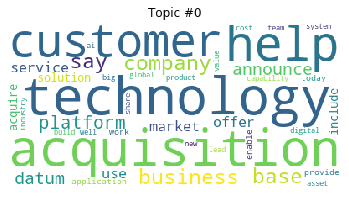

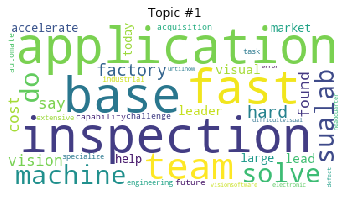

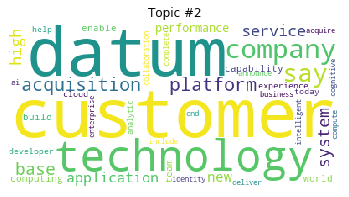

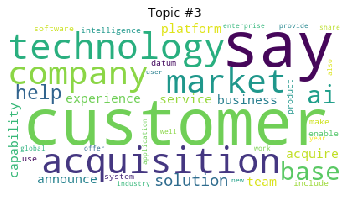

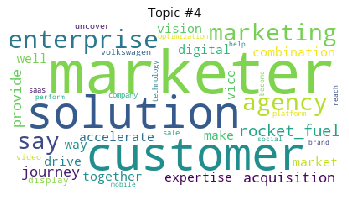

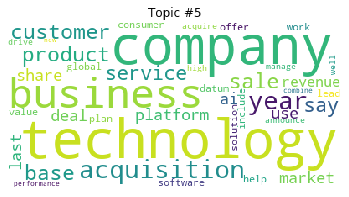

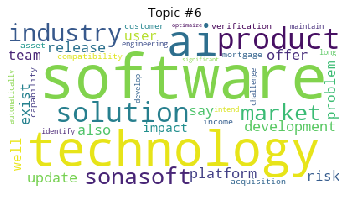

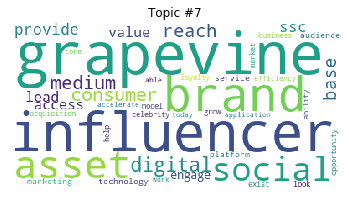

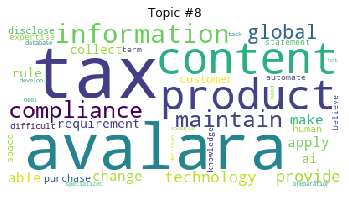

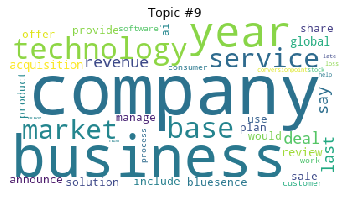

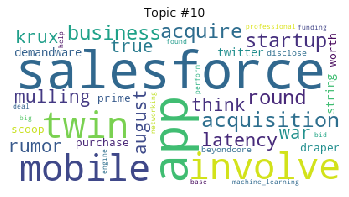

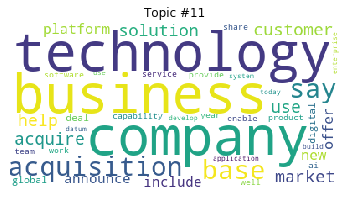

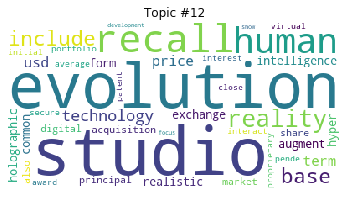

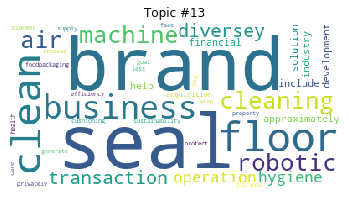

In [28]:
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    #plt.imshow(WordCloud().fit_words(lda_model.show_topic(t, 200)))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 40))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic#"+str(t), format='pdf')
    plt.show()

In [30]:
Topic_0 = []
Topic_1 = []
Topic_2 = []
Topic_3 = []
Topic_4 = []
Topic_5 = []
Topic_6 = []
Topic_7 = []
Topic_8 = []
Topic_9 = []
Topic_10 = []
Topic_11 = []
Topic_12 = []
Topic_13 = []
Doc_No = []
data_lemmatized_word = []
for i, row in enumerate(lda_model[corpus]):
    #row = sorted(row, key=lambda x:x[1], reverse=True)
    Topic_0.append(0);
    Topic_1.append(0);
    Topic_2.append(0);
    Topic_3.append(0);
    Topic_4.append(0);
    Topic_5.append(0);
    Topic_6.append(0);
    Topic_7.append(0);
    Topic_8.append(0);
    Topic_9.append(0);
    Topic_10.append(0);
    Topic_11.append(0);
    Topic_12.append(0);
    Topic_13.append(0);
    Doc_No.append(i);
    data_lemmatized_word.append(data_lemmatized[i])
    for k in range(len(row)):
        if(row[k][0]==0):
            Topic_0[i]=row[k][1];
        if(row[k][0]==1):
            Topic_1[i]=row[k][1];
        if(row[k][0]==2):
            Topic_2[i]=row[k][1];
        if(row[k][0]==3):
            Topic_3[i]=row[k][1];
        if(row[k][0]==4):
            Topic_4[i]=row[k][1];
        if(row[k][0]==5):
            Topic_5[i]=row[k][1];
        if(row[k][0]==6):
            Topic_6[i]=row[k][1];
        if(row[k][0]==7):
            Topic_7[i]=row[k][1];
        if(row[k][0]==8):
            Topic_8[i]=row[k][1];
        if(row[k][0]==9):
            Topic_9[i]=row[k][1];
        if(row[k][0]==10):
            Topic_10[i]=row[k][1];
        if(row[k][0]==11):
            Topic_11[i]=row[k][1];
        if(row[k][0]==12):
            Topic_12[i]=row[k][1];
        if(row[k][0]==13):
            Topic_13[i]=row[k][1];
df = pd.DataFrame(list(zip(Doc_No, Topic_0, Topic_1, Topic_2, Topic_3, Topic_4, Topic_5, Topic_6, Topic_7, Topic_8, Topic_9, Topic_10, Topic_11, Topic_12, Topic_13, data_lemmatized_word)), 
               columns = ['Doc_No', 'Topic#0', 'Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5', 'Topic#6', 'Topic#7', 'Topic#8', 'Topic#9', 'Topic#10', 'Topic#11', 'Topic#12', 'Topic#13','Text'])
df.to_csv('Topic_Score_for_each_Document_Using_Trigrams.csv')

In [39]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model.show_topics(num_words=5)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
print(len(lda_topics))
for topic in lda_topics:
    print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

10
(10, '0.001*"salesforce" + 0.001*"app" + 0.001*"involve" + 0.001*"twin" + 0.001*"mobile"')
(0, '0.001*"technology" + 0.001*"acquisition" + 0.001*"help" + 0.001*"customer" + 0.001*"company"')
(3, '0.001*"customer" + 0.001*"say" + 0.001*"acquisition" + 0.001*"technology" + 0.001*"company"')
(7, '0.009*"grapevine" + 0.008*"influencer" + 0.008*"brand" + 0.007*"asset" + 0.005*"social"')
(11, '0.001*"technology" + 0.001*"company" + 0.001*"business" + 0.001*"acquisition" + 0.001*"say"')
(5, '0.001*"technology" + 0.001*"company" + 0.001*"business" + 0.001*"acquisition" + 0.001*"year"')
(9, '0.012*"company" + 0.007*"business" + 0.007*"year" + 0.007*"technology" + 0.006*"base"')
(6, '0.009*"software" + 0.006*"technology" + 0.006*"ai" + 0.005*"product" + 0.004*"solution"')
(8, '0.006*"tax" + 0.004*"avalara" + 0.003*"content" + 0.003*"product" + 0.002*"information"')
(1, '0.003*"application" + 0.002*"inspection" + 0.002*"base" + 0.002*"fast" + 0.002*"team"')
[['salesforce', 'app', 'involve', 't

In [49]:
lda_model.print_topics(num_words=30)
keywords = []
for i in range(len(lda_model.print_topics(num_words=30))):
    keywords.append(preprocess_string(lda_model.print_topics(num_words=30)[i][1], filters))
    
print(keywords)
Topic0 = keywords[0]
Topic1 = keywords[1]
Topic2 = keywords[2]
Topic3 = keywords[3]
Topic4 = keywords[4]
Topic5 = keywords[5]
Topic6 = keywords[6]
Topic7 = keywords[7]
Topic8 = keywords[8]
Topic9 = keywords[9]
Topic10 = keywords[10]
Topic11 = keywords[11]
Topic12 = keywords[12]
Topic13 = keywords[13]
df = pd.DataFrame(list(zip(Topic0, Topic1, Topic2, Topic3, Topic4, Topic5, Topic6, Topic7, Topic8, Topic9, Topic10, Topic11, Topic12, Topic13)), 
               columns = ['Topic#0', 'Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5', 'Topic#6', 'Topic#7', 'Topic#8', 'Topic#9', 'Topic#10', 'Topic#11', 'Topic#12', 'Topic#13'])
df.to_csv('Topic_Keywords_in_Trigrams.csv')      

[['technology', 'acquisition', 'help', 'customer', 'company', 'base', 'say', 'business', 'platform', 'datum', 'announce', 'service', 'market', 'use', 'offer', 'solution', 'acquire', 'include', 'application', 'enable', 'work', 'provide', 'today', 'capability', 'global', 'team', 'ai', 'new', 'product', 'digital'], ['application', 'inspection', 'base', 'fast', 'team', 'machine', 'solve', 'sualab', 'do', 'factory', 'hard', 'vision', 'say', 'cost', 'found', 'visual', 'lead', 'leader', 'accelerate', 'large', 'market', 'help', 'today', 'capability', 'acquisition', 'future', 'automate', 'challenge', 'engineering', 'industrial'], ['customer', 'datum', 'technology', 'company', 'say', 'acquisition', 'platform', 'system', 'base', 'service', 'high', 'application', 'new', 'performance', 'capability', 'build', 'enable', 'world', 'computing', 'team', 'experience', 'cloud', 'help', 'today', 'developer', 'acquire', 'announce', 'ai', 'include', 'business'], ['customer', 'say', 'acquisition', 'technology'